## Startup -- RSM Template

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import edoxrd as xrd
from ipywidgets import interact, fixed, FloatSlider

%matplotlib inline
%config InlineBackend.figure_formats = set(['png'])

In [8]:
!pip install peakutils --user

  Running setup.py bdist_wheel for peakutils ... done
  Stored in directory: /users/zatterin/.cache/pip/wheels/47/a5/7e/f1f31e3a04014971676dcbd1ec1becb97e047a10f57d9a531b
Successfully built peakutils


Specify the name of the main sample you want to look at, and the directory within which it is found.

In [47]:
# d = './example_data/'
d = '/users/zatterin/Documents/data/XRD/2016/e16018//DteX/'
%ls {d} # should work on Windows too!

e16018_01_-103_KTO_RSM_2-Theta.asc  e16018_03_-104_KTO_RSM_2-Theta.asc
e16018_01_-103_KTO_RSM_2-Theta.raw  e16018_03_-104_KTO_RSM_2-Theta.raw
e16018_01_-103_KTO_RSM.ras          e16018_03_-104_KTO_RSM.ras
e16018_02_-103_PTO_RSM_2-Theta.asc  e16018_04_-104_PTO_RSM_2-Theta.asc
e16018_02_-103_PTO_RSM_2-Theta.raw  e16018_04_-104_PTO_RSM_2-Theta.raw
e16018_02_-103_PTO_RSM.ras          e16018_04_-104_PTO_RSM.ras


Some code to find within the directory only the files with `.asc` extension, and store them into lists depending on the index of the reflection. In the example case, only the -103 reflection datafiles are present, so that only the `_103` list (containing both substrate and film files) is generated.

In [48]:
# Linux/Mac OS
_103 = !ls {d} | grep '103' | grep asc
_104 = !ls {d} | grep '104' | grep asc
_002 = !ls {d} | grep '002' | grep asc
# Windows
# _103 = !dir {d} | find '103' | find asc
# _104 = !dir {d} | find '104' | find asc
# _002 = !dir {d} | find '002' | find asc
for index,fname in enumerate(_103):
    print fname
    _103[index] = d+fname
for index,fname in enumerate(_104):
    print fname
    _104[index] = d+fname
for index,fname in enumerate(_002):
    print fname
    _002[index] = d+fname

e16018_01_-103_KTO_RSM_2-Theta.asc
e16018_02_-103_PTO_RSM_2-Theta.asc
e16018_03_-104_KTO_RSM_2-Theta.asc
e16018_04_-104_PTO_RSM_2-Theta.asc


## Plot RSMs

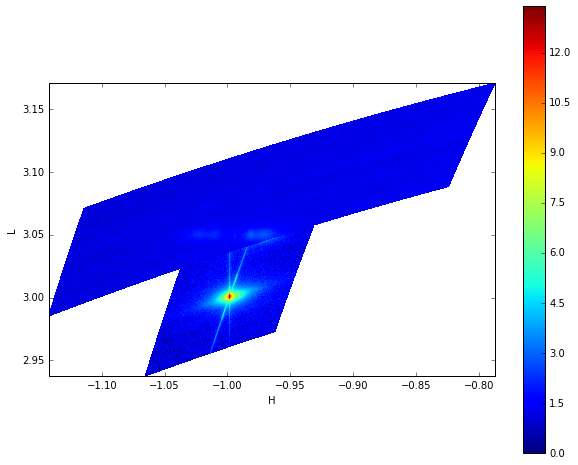

In [49]:
fig = plt.figure(figsize=(10,8))
xrd.plt_rsm(_103[0],_103[1],'film')

## Profiles

In [5]:
dset = _103[1]

In [6]:
h,l,i = xrd.read_rsm_data(dset)
interact(xrd.plt_prof, sample=fixed(dset), scale=fixed('lin'), 
         L=FloatSlider(min=l.min(), max=l.max(), step=0.001, value=l[np.where(i==i.max())].max(), continuous_update=False), 
         H=FloatSlider(min=h.min(), max=h.max(), step=0.0001, value=h[np.where(i==i.max())].max(), continuous_update=False), 
         win=fixed(11), polyorder=fixed(3));